In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale=1. /255)
datagen_test = ImageDataGenerator(rescale = 1. /255)

data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/dataset/train', 
    target_size=(48,48),
    batch_size=64,
    shuffle=True, 
    color_mode='grayscale',
    class_mode='categorical'
    )

data_gen_pruebas = datagen_test.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/dataset/test',
    target_size=(48,48), 
    batch_size=64, 
    color_mode='grayscale',
    class_mode='categorical'
    )

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(data_gen_entrenamiento, epochs=100, validation_data=data_gen_pruebas)

Epoch 1/100
475/475 [==============================] - 1987s 4s/step - loss: 1.8462 - accuracy: 0.2447 - val_loss: 1.7491 - val_accuracy: 0.3247
Epoch 2/100
475/475 [==============================] - 57s 120ms/step - loss: 1.6690 - accuracy: 0.3514 - val_loss: 1.5459 - val_accuracy: 0.4145
Epoch 3/100
475/475 [==============================] - 57s 119ms/step - loss: 1.5415 - accuracy: 0.4123 - val_loss: 1.4385 - val_accuracy: 0.4563
Epoch 4/100
475/475 [==============================] - 56s 118ms/step - loss: 1.4456 - accuracy: 0.4495 - val_loss: 1.3771 - val_accuracy: 0.4804
Epoch 5/100
475/475 [==============================] - 55s 116ms/step - loss: 1.3821 - accuracy: 0.4765 - val_loss: 1.3167 - val_accuracy: 0.5000
Epoch 6/100
475/475 [==============================] - 56s 117ms/step - loss: 1.3291 - accuracy: 0.4932 - val_loss: 1.2822 - val_accuracy: 0.5189
Epoch 7/100
475/475 [==============================] - 56s 119ms/step - loss: 1.2883 - accuracy: 0.5116 - val_loss: 1.2509 - 

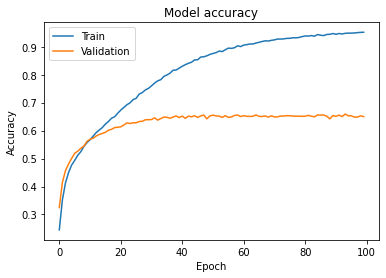

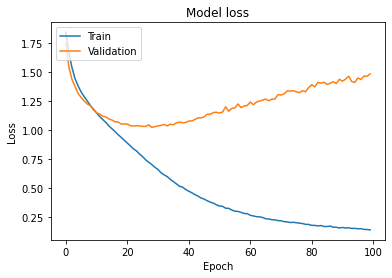

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()